## Trabalho Final Sistemas Inteligentes 2


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
import librosa.display
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
import random
import keras
import os

# https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

c:\Users\gusta\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Classificador de gênero com features do dataset

In [314]:
dir_path = "./data/"
os.listdir(dir_path)

['features_30_sec.csv', 'features_3_sec.csv', 'genres_original', 'mfccs']

In [315]:
# Extrai os dados dos audios
data = pd.read_csv(dir_path + 'features_3_sec.csv')
np.random.seed(42)

conjunto de treino e teste

In [316]:
# Extrair X e Y
X = data.iloc[:, 2:-1]  # Da terceira até a penúltima coluna
Y = data.iloc[:, -1]    # Última coluna

# Deixa os valores de cada coluna entre um e menos um
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Codificar as labels (gêneros musicais) em números
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)


# Dividir o conjunto de dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Exibir as dimensões dos conjuntos
print("Dimensões do conjunto de treino X:", X_train.shape)
print("Dimensões do conjunto de teste X:", X_test.shape)
print("Dimensões do conjunto de treino Y:", Y_train.shape)
print("Dimensões do conjunto de teste Y:", Y_test.shape)


Dimensões do conjunto de treino X: (7992, 57)
Dimensões do conjunto de teste X: (1998, 57)
Dimensões do conjunto de treino Y: (7992,)
Dimensões do conjunto de teste Y: (1998,)


## Classificar genero musical 

Inicialmente Criamos uma DNN

In [324]:
# Definir o modelo DNN para classificação
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[57]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Número de classes é 10, assumindo que há 10 gêneros musicais
])

In [325]:
model.summary()

# Compilar o modelo
model.compile(  optimizer='adam', loss='categorical_crossentropy',
                metrics=["accuracy", "MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"])


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 128)               7424      
                                                                 
 dense_80 (Dense)            (None, 64)                8256      
                                                                 
 dense_81 (Dense)            (None, 32)                2080      
                                                                 
 dense_82 (Dense)            (None, 10)                330       
                                                                 
Total params: 18,090
Trainable params: 18,090
Non-trainable params: 0
_________________________________________________________________


In [336]:
# Treinar o modelo
# Converter os rótulos para o formato adequado
Y_train_categorical = keras.utils.to_categorical(Y_train, num_classes=10)
Y_test_categorical = keras.utils.to_categorical(Y_test, num_classes=10)

exp_epochs = 30
history = model.fit(
    X_train, Y_train_categorical,
    epochs= exp_epochs,
    batch_size=17,
    shuffle=True,
    validation_data=(X_test, Y_test_categorical)
)

Epoch 1/30


471/471 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8535 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1442 - mean_absolute_error: 0.0429 - val_loss: 0.4996 - val_accuracy: 0.8403 - val_mean_squared_error: 0.0234 - val_root_mean_squared_error: 0.1530 - val_mean_absolute_error: 0.0457
Epoch 2/30
471/471 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8717 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1365 - mean_absolute_error: 0.0394 - val_loss: 0.5500 - val_accuracy: 0.8093 - val_mean_squared_error: 0.0265 - val_root_mean_squared_error: 0.1628 - val_mean_absolute_error: 0.0481
Epoch 3/30
471/471 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8691 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1369 - mean_absolute_error: 0.0391 - val_loss: 0.4868 - val_accuracy: 0.8318 - val_mean_squared_error: 0.0239 - val_root_mean_squared_error: 0.1547 - val_mean_absolute_error

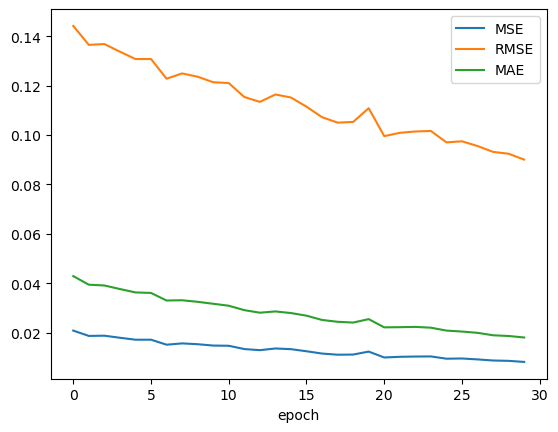

In [337]:
# Plotar métricas de treinamento
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

63/63 [==============================] - 0s 795us/step


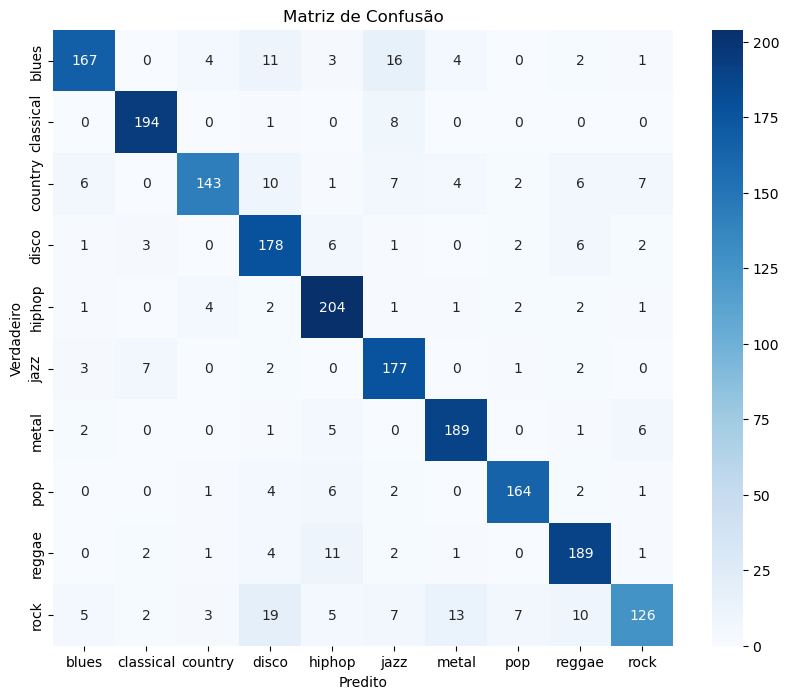

In [338]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Avaliar o modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test_categorical, axis=1)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [339]:
from sklearn.metrics import accuracy_score, precision_score
# Calcular a porcentagem total de acertos
acuracia_total = accuracy_score(y_true, y_pred_classes)

# Exibir a porcentagem total de acertos
print(f'Acurácia Total: {acuracia_total * 100:.2f}%\n')

# Calcular a precisão para cada classe
precision_per_class = precision_score(y_true, y_pred_classes, average=None)

# Exibir a precisão para cada classe
for i, precision in enumerate(precision_per_class):
    genre = label_encoder.classes_[i]
    print(f'Precisão para {genre}: {precision * 100:.2f}%')

Acurácia Total: 86.64%

Precisão para blues: 90.27%
Precisão para classical: 93.27%
Precisão para country: 91.67%
Precisão para disco: 76.72%
Precisão para hiphop: 84.65%
Precisão para jazz: 80.09%
Precisão para metal: 89.15%
Precisão para pop: 92.13%
Precisão para reggae: 85.91%
Precisão para rock: 86.90%


## Classificador com Features extraidas pela librosa

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
import librosa.display
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
import random
import keras
import os



c:\Users\gusta\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Criando arquivos com media dos features do audio para classificação




In [62]:

# Caminho para o áudio original
audio_path = './data/genres_original/'
features_path = './data/features_mean/'

generes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for i in range(len(generes)):
    genre = generes[i]
    audio = audio_path + genre + '/'
    
    # Criar diretório se não existir
    if not os.path.exists(features_path + genre):
        os.makedirs(features_path + genre)
    
    # Listar todos os arquivos no diretório
    all_files = os.listdir(audio)

    # Filtrar os arquivos que correspondem ao padrão de nome de arquivo
    audio_files = [f for f in all_files]
    
    for audio_file in audio_files:
        # Carregar o arquivo de áudio
        if audio_file == 'jazz.00054.wav':
            continue
        
        sound, sr = librosa.load(audio + audio_file, sr=None)
        intervalo = int(22050 * 3)

        # Criar nove conjuntos de coeficientes MFCC e outras medidas
        for j in range(1, 10):
            start = int((j - 1) * intervalo)
            end = int(j * intervalo)
            
            sound_interval = sound[start:end]
            # print(sound_interval.shape)
            # Extrair características
            mfccs = np.mean(librosa.feature.mfcc(y=sound_interval, sr=sr, n_mfcc=128), axis=1, keepdims=True)
            chroma_stft = np.mean(librosa.feature.chroma_stft(y=sound_interval, sr=sr), axis=1, keepdims=True)
            rms = np.mean(librosa.feature.rms(y=sound_interval))
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=sound_interval, sr=sr))
            spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=sound_interval, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=sound_interval, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=sound_interval))
            print(mfccs.shape)
            print(chroma_stft.shape)
            print(rms.shape)
            print(spectral_centroid.shape)
            print(spectral_bandwidth.shape)
            feature_file = audio_file.replace('.wav', f'_{j}.npy')
            # np.save(features_path + genre + '/' + feature_file, np.vstack((mfccs, chroma_stft, rms, spectral_centroid,
                                                                                # spectral_bandwidth, rolloff, zero_crossing_rate)))

(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12, 1)
()
()
()
(128, 1)
(12

KeyboardInterrupt: 

## Criando pasta com apenas os MFCCS

In [166]:

# Caminho para o áudio original
audio_path = './data/genres_original/'
mfccs_path = './data/mfccs/'

generes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for i in range(len(generes)):
    genre = generes[i]
    audio = audio_path + genre + '/'
    
    # Criar diretório se não existir
    if not os.path.exists(mfccs_path + genre):
        os.makedirs(mfccs_path + genre)
    
    # Listar todos os arquivos no diretório
    all_files = os.listdir(audio)

    # Filtrar os arquivos que correspondem ao padrão de nome de arquivo
    audio_files = [f for f in all_files]
    
    for audio_file in audio_files:
        # Carregar o arquivo de áudio
        if audio_file == 'jazz.00054.wav':
            continue
        
        sound, sr = librosa.load(audio + audio_file, sr=None)
        intervalo = int(22050 * 3)

        # Criar nove conjuntos de coeficientes MFCC e outras medidas
        for j in range(1, 10):
            start = int((j - 1) * intervalo)
            end = int(j * intervalo)
            
            sound_interval = sound[start:end]

            # Extrair características
            mfccs = librosa.feature.mfcc(y=sound_interval, sr=sr, n_mfcc=128)

            # Salvar características
            feature_file = audio_file.replace('.wav', f'_{j}.npy')
            np.save(mfccs_path + genre + '/' + feature_file, mfccs)

## Classificador

Carregando arquivos

In [2]:
# Lista para armazenar os espectrogramas
audio_path = './data/genres_original/'
features_mean_path = './data/features_mean/'
generes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

features_mean = []
labels_mean = []

for genre in generes:
    genre_path = features_mean_path + genre + '/'
    # Listar todos os arquivos no diretório
    all_files = os.listdir(genre_path)
    for file in all_files:

        fs = np.load(genre_path + file)
        features_mean.append(fs)
        labels_mean.append(genre)


# Converter a lista de emfccas para um array numpy
features_mean = np.array(features_mean)
labels_mean = np.array(labels_mean)

# Codificar as labels (gêneros musicais) em números
label_encoder = LabelEncoder()
labels_mean = label_encoder.fit_transform(labels_mean)

# normalizar
max_c = np.max(np.abs(features_mean))
features_mean = features_mean / max_c

# Dividir os dados em treino e teste
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(features_mean, labels_mean, test_size=0.2, random_state=42, stratify=labels_mean)

Y_train_mean = keras.utils.to_categorical(Y_train_mean, num_classes=10)
Y_test_mean = keras.utils.to_categorical(Y_test_mean, num_classes=10)
print(X_test_mean.shape)

(1799, 145, 1)


## Carregar modelo

In [3]:
i = 0
classificador = tf.keras.models.load_model("modelo_classificador" + str(i)+".h5")

classificador.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=["accuracy","MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"])



## definindo modelo classificador

In [3]:

classificador = keras.models.Sequential([
    keras.layers.Dense(145, activation='relu', input_shape=[145]),
    keras.layers.Dense(104, activation='relu'),
    keras.layers.Dense(64, activation='relu'),     
    keras.layers.Dense(32, activation='relu'),      
    keras.layers.Dense(10, activation='softmax') 
])

classificador.summary()

classificador.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=["accuracy","MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 145)               21170     
                                                                 
 dense_1 (Dense)             (None, 104)               15184     
                                                                 
 dense_2 (Dense)             (None, 64)                6720      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 45,484
Trainable params: 45,484
Non-trainable params: 0
_________________________________________________________________


treinando modelo classificador

In [4]:

history = classificador.fit(
    X_train_mean, Y_train_mean,
    epochs=720,
    batch_size=8,
    shuffle=True,
    validation_data=(X_test_mean, Y_test_mean)
)

Epoch 1/720
899/899 [==============================] - 2s 2ms/step - loss: 2.0302 - accuracy: 0.2328 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2897 - mean_absolute_error: 0.1684 - val_loss: 1.8916 - val_accuracy: 0.2852 - val_mean_squared_error: 0.0806 - val_root_mean_squared_error: 0.2839 - val_mean_absolute_error: 0.1611
Epoch 2/720
899/899 [==============================] - 1s 2ms/step - loss: 1.8853 - accuracy: 0.2818 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2830 - mean_absolute_error: 0.1605 - val_loss: 1.8322 - val_accuracy: 0.2996 - val_mean_squared_error: 0.0785 - val_root_mean_squared_error: 0.2802 - val_mean_absolute_error: 0.1596
Epoch 3/720
899/899 [==============================] - 1s 2ms/step - loss: 1.7862 - accuracy: 0.3172 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2768 - mean_absolute_error: 0.1546 - val_loss: 1.6927 - val_accuracy: 0.3535 - val_mean_squared_error: 0.0737 - val_root_mean_squared_error: 0.2715 - val_mean_

salvando modelo

In [5]:
# i = 0
# classificador.save("modelo_classificador" + str(i)+".h5")

acuracia treino

Precisão no Treino: 98.85%


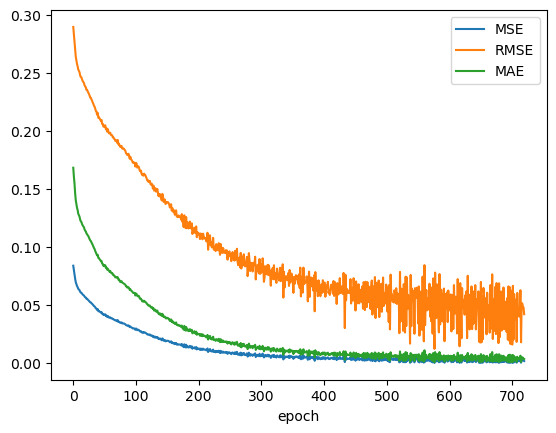

In [15]:
# Obter a precisão no treino
train_accuracy = history.history['accuracy'][-1]

# Exibir a precisão no treino
print(f'Precisão no Treino: {train_accuracy * 100:.2f}%')

# Plotar métricas de treinamento
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

matriz de confusão teste

57/57 [==============================] - 0s 1ms/step
(7192, 145, 1)


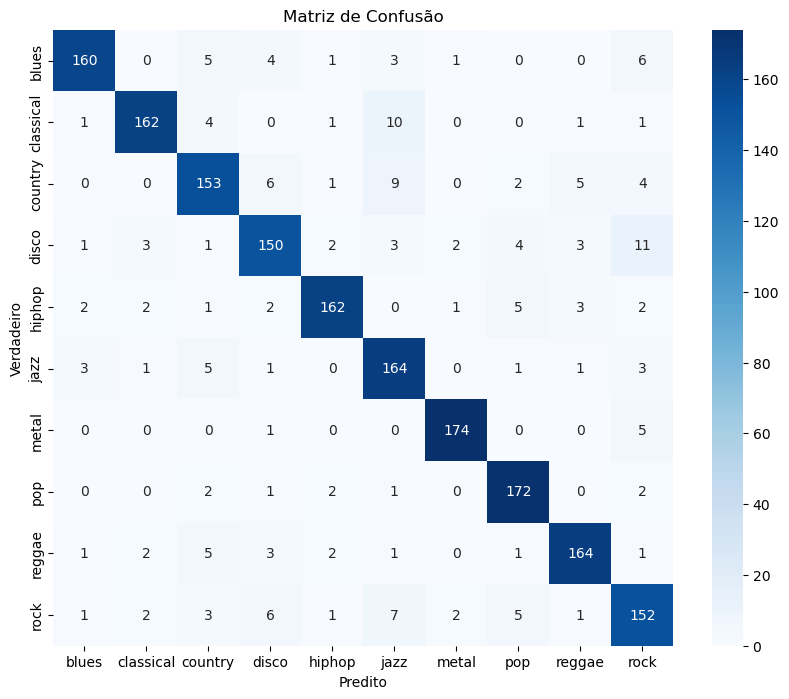

In [4]:
# Avaliar o modelo
y_pred = classificador.predict(X_test_mean)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test_mean, axis=1)

print(X_train_mean.shape)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

acuracia teste

In [5]:
# Calcular a porcentagem total de acertos
acuracia_total = accuracy_score(y_true, y_pred_classes)

# Exibir a porcentagem total de acertos
print(f'Acurácia Total: {acuracia_total * 100:.2f}%\n')

# Calcular a precisão para cada classe
precision_per_class = precision_score(y_true, y_pred_classes, average=None)


# Exibir a precisão para cada classe
for i, precision in enumerate(precision_per_class):
    genre = label_encoder.classes_[i]
    print(f'Precisão para {genre}: {precision * 100:.2f}%')



Acurácia Total: 89.66%

Precisão para blues: 94.67%
Precisão para classical: 94.19%
Precisão para country: 85.47%
Precisão para disco: 86.21%
Precisão para hiphop: 94.19%
Precisão para jazz: 82.83%
Precisão para metal: 96.67%
Precisão para pop: 90.53%
Precisão para reggae: 92.13%
Precisão para rock: 81.28%


## testando classificador
- escolhendo uma musica aleatória

In [6]:
audio_path = './data/genres_original/'

valores =   [0, 100,  # 0 - blues
            100, 200, # 1 - classical
            200, 300, # 2 - country
            300, 400, # 3 - disco
            400, 500, # 4 - hiphop
            500, 600, # 5 - jazz
            600, 700, # 6 - metal
            700, 800, # 7 - pop
            800, 900, # 8 - reggae
            900, 1000] # 9 - rock

# escolha o indice correspondente ao genero
indice = 8
indice = int(indice*2)

# Intervalo correspondente ao gênero no array "valores"
intervalo = valores[indice:indice + 2]

# Extrair os limites do intervalo
limite_inferior, limite_superior = intervalo
print(limite_inferior)
print(limite_superior)

np.random.seed(None)
tf.random.set_seed(None)
import math

# Escolher um número aleatório dentro do intervalo
numero_aleatorio = random.randint(limite_inferior, limite_superior)
print(numero_aleatorio)

genero = generes[int(math.floor(numero_aleatorio/100))]
musica = numero_aleatorio - int(math.floor(numero_aleatorio/100) * 100)
print(musica)
print(genero)

if musica < 10:
    arquivo = audio_path + genero +'/'+genero+'.0000'+str(musica)+'.wav'
else:
    arquivo = audio_path + genero +'/'+genero+'.000'+str(musica)+'.wav'

sinal_audio, sr = librosa.load(arquivo, sr=None)
sinal_audio = sinal_audio[:int(22050*3)]

mfccs = np.mean(librosa.feature.mfcc(y=sinal_audio, sr=sr, n_mfcc=128), axis=1, keepdims=True)
chroma_stft = np.mean(librosa.feature.chroma_stft(y=sinal_audio, sr=sr), axis=1, keepdims=True)
rms = np.mean(librosa.feature.rms(y=sinal_audio))
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=sinal_audio, sr=sr))
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=sinal_audio, sr=sr))
rolloff = np.mean(librosa.feature.spectral_rolloff(y=sinal_audio, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=sinal_audio))

entrada = np.vstack((mfccs, chroma_stft, rms, spectral_centroid,
            spectral_bandwidth, rolloff, zero_crossing_rate))

print(entrada.shape)
print(X_test_mean[0].shape)
entrada = entrada/max_c
ipd.Audio(sinal_audio,rate=22050)



800
900
836
36
reggae
(145, 1)
(145, 1)


In [7]:
# Predição
entrada = np.expand_dims(entrada, axis=0)
result = classificador.predict(entrada)


# Exibindo as porcentagens para cada classe
resultados = dict(zip(generes, result[0]))

# Ordenando as porcentagens em ordem decrescente
resultados_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)

# Exibindo os resultados ordenados
for genero, probabilidade in resultados_ordenados:
    print(f'{genero}: {probabilidade * 100:.5f}%')

1/1 [==============================] - 0s 26ms/step
reggae: 100.00000%
hiphop: 0.00000%
rock: 0.00000%
pop: 0.00000%
jazz: 0.00000%
country: 0.00000%
disco: 0.00000%
classical: 0.00000%
metal: 0.00000%
blues: 0.00000%


In [10]:
import spotipy
import requests

def play_and_save_spotify_track(track_url, output_folder):
    # Configurar credenciais do cliente do Spotify
    client_id = '6332c203377240ae9238512a8404fbba'
    client_secret = 'abf6cb7f96d445b4bde46dbed4b92eed'

    # Configurar autenticação do Spotipy
    client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Obter informações da faixa
    track_id = track_url.split("/")[-1]
    track_info = sp.track(track_id)

    # Obter a URL da prévia da faixa
    preview_url = track_info.get('preview_url')

    if preview_url:
        # print("Preview URL:", preview_url)

        # Baixar a prévia da faixa
        audio_content = requests.get(preview_url).content

        # Salvar o arquivo de áudio
        output_file = f"{output_folder}/{track_info['name']}_{track_info['artists'][0]['name']}.wav".replace(" ", "_")
        
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        with open(output_file, 'wb') as file:
            file.write(audio_content)

    else:
        print("Esta faixa não possui uma prévia disponível.")

# Inserir a URL da faixa do Spotify aqui
spotify_track_url = "https://open.spotify.com/track/0redQHBfejmPUhonR5ppGC"

# Especificar a pasta de saída
output_folder = "./Data/spotify/"

# Baixar, salvar e opcionalmente reproduzir a faixa
play_and_save_spotify_track(spotify_track_url, output_folder)

# Abrir a pasta e pegar o primeiro arquivo
if os.path.exists(output_folder):
    files = os.listdir(output_folder)
    
arquivo = files[0]

sinal_audio, sr = librosa.load(output_folder+arquivo, sr=None)
sinal_audio = librosa.resample(sinal_audio, orig_sr=sr, target_sr=22050)
sr = 22050

print(sinal_audio.shape)
ipd.Audio(sinal_audio,rate=sr)


(655164,)


In [11]:
intervalo = int(sr*3)
entrada = []

# separa a musica em 10 partes e pega suas features
for j in range(1, 11):
    start = int((j - 1) * intervalo)
    end = int(j * intervalo)

    sound_interval= sinal_audio[start:end]


    mfcc = np.mean(librosa.feature.mfcc(y=sound_interval, sr=sr, n_mfcc=128), axis=1, keepdims=True)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=sound_interval, sr=sr), axis=1, keepdims=True)
    rms = np.mean(librosa.feature.rms(y=sound_interval))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=sound_interval, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=sound_interval, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=sound_interval, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=sound_interval))

    entrada.append(np.vstack((mfcc, chroma_stft, rms, spectral_centroid,
                spectral_bandwidth, rolloff, zero_crossing_rate)))

entrada = np.array(entrada)
entrada = entrada / max_c



In [12]:
result = classificador.predict(entrada)

probabilidades_totais = np.sum(result, axis=0)
probabilidades_totais_media = probabilidades_totais / len(entrada)

resultados_totais = dict(zip(generes, probabilidades_totais_media))

resultados_ordenados_totais = sorted(resultados_totais.items(), key=lambda x: x[1], reverse=True)

# Exibindo os resultados ordenados totais
for genero, probabilidade in resultados_ordenados_totais:
    print(f'{genero}: {probabilidade * 100:.9f}%')

1/1 [==============================] - 0s 28ms/step
pop: 77.428513765%
hiphop: 9.940356761%
disco: 6.709907204%
jazz: 3.381105885%
reggae: 1.437575370%
rock: 0.954355299%
country: 0.148178264%
classical: 0.000007450%
metal: 0.000000000%
blues: 0.000000000%


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
import librosa.display
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
import random
import keras
import os

## Carrega MFCCs e divide em conjuntos de treino e teste

In [2]:
# Lista para armazenar os espectrogramas
audio_path = './data/genres_original/'
mfcc_path = './data/mfccs/'

generes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

mfccs = []
labels = []

for genre in generes:
    genre_path = mfcc_path + genre + '/'
    # Listar todos os arquivos no diretório

    all_files = os.listdir(genre_path)
    for file in all_files:
        mfcc = np.load(genre_path + file)
        mfccs.append(mfcc)
        labels.append(genre)


# Converter a lista de emfccas para um array numpy
mfccs = np.array(mfccs)
labels = np.array(labels)

# Codificar as labels (gêneros musicais) em números
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# normalizar
max = np.max(np.abs(mfccs))
mfccs = mfccs / max

# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(mfccs, labels, test_size=0.2, random_state=42, stratify=labels)

s2 = librosa.feature.inverse.mfcc_to_audio(X_test[0]*max, n_mels=128)

Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = keras.utils.to_categorical(Y_test, num_classes=10)

ipd.Audio(s2,rate=22050)


In [3]:
i = 10
encoder = tf.keras.models.load_model("modelo_encoder" + str(i)+".h5")
decoder = tf.keras.models.load_model("modelo_decoder" + str(i)+".h5")


## Define Encoder e Decoder

In [ ]:

# Definir o modelo autoencoder
input_shape = X_train.shape[1:]
print(input_shape) # (145, 130)
latent_dim = 2056  # Ajuste conforme necessário

# Definir o modelo encoder
encoder = keras.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(latent_dim, activation='tanh')
])

# Definir o modelo decoder
decoder = keras.Sequential([
    keras.layers.InputLayer(input_shape=(latent_dim,)),
    keras.layers.Dense(np.prod(input_shape), activation='linear'),
    keras.layers.Reshape(input_shape)
])


(128, 130)


## Define o autoencoder

In [4]:
# Construir o modelo autoencoder
input_shape = X_train.shape[1:]

# Combinar encoder e decoder para formar o autoencoder
autoencoder = keras.Sequential([
    encoder,
    decoder
])

autoencoder.build(input_shape=(None,) + input_shape)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse',
                metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"])

autoencoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512)               8520192   
                                                                 
 sequential_1 (Sequential)   (None, 128, 130)          8536320   
                                                                 
Total params: 17,056,512
Trainable params: 17,056,512
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Treinar o modelo
history = autoencoder.fit(X_train, X_train, epochs=150, batch_size=29, validation_data=(X_test, X_test))

Epoch 1/150
  8/248 [..............................] - ETA: 2:42 - loss: 7.1322e-04 - mean_squared_error: 7.1322e-04 - root_mean_squared_error: 0.0267 - mean_absolute_error: 0.0146

KeyboardInterrupt: 

In [ ]:
i = 11
# decoder.save("modelo_decoder" + str(i)+".h5")
# encoder.save("modelo_encoder" + str(i)+".h5")


plota as metricas

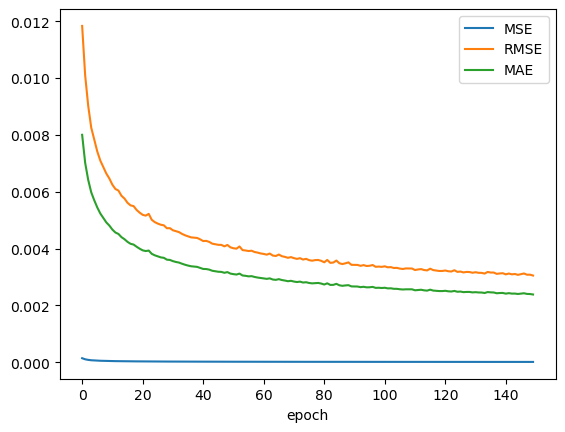

In [ ]:
# Plotar métricas de treinamento
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

## reconstrução das entradas

In [5]:
# realizar a codificação do conjunto de teste
encoded = encoder.predict(X_test)
# reconstruir as entradas por meio dos codings
decoded = decoder.predict(encoded)
# decoded = np.squeeze(decoded, axis=-1)

print(decoded.shape)
print(encoded.shape)


57/57 [==============================] - 0s 6ms/step
(1799, 128, 130)
(1799, 512)


In [6]:
indice =36

m1 = X_test[indice]*max
m2 = decoded[indice]*max

# m1 = m1[:128, :]
# m2 = m2[:128, :]

print(m1.shape)
print(m2.shape)

print(np.sum(m1))
print(np.sum(m2))

print(np.count_nonzero(m1<0))
print(np.count_nonzero(m2<0)) # conta numeros negativos

(128, 130)
(128, 130)
-3334.7515
-3950.4336
9203
9644


reproduzindo audio MFCCs original

In [7]:

s1 = librosa.feature.inverse.mfcc_to_audio(m1, n_mels=128)
s2 = librosa.feature.inverse.mfcc_to_audio(m2, n_mels=128)

print(s1.shape)
print(s2.shape)

ipd.Audio(s1,rate=22050)

(66048,)
(66048,)


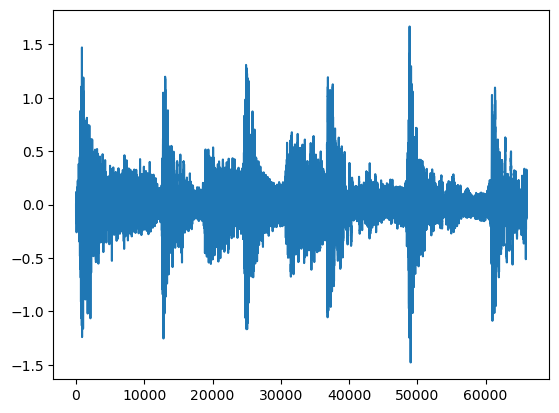

In [8]:
plt.plot(s1)

reproduzindo saida decoder

In [9]:

ipd.Audio(s2,rate=22050)

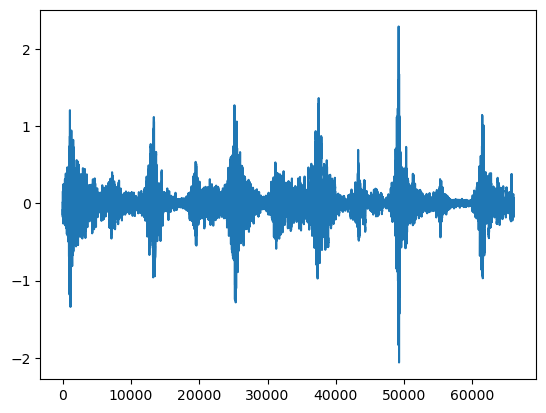

In [10]:
plt.plot(s2)

## Geração de musica

pegando os valores proximos da moda de cada coluna resultante do encoder 
pegar de um estilo musical apenas, por exemplo, do 0 ao 99, ou 300 ao 399

In [11]:
valores =   [0, 900,    # 0 - blues
            900, 1800,  # 1 - classical
            1800, 2700, # 2 - country
            2700, 3600, # 3 - disco
            3600, 4500, # 4 - hiphop
            4500, 5391, # 5 - jazz
            5391, 6291, # 6 - metal
            6291, 7191, # 7 - pop
            7191, 8091, # 8 - reggae
            8091, 8991] # 9 - rock

indice = 1
indice = int(indice * 2)  
# realizar a codificação do conjunto de teste
encoded = encoder.predict(mfccs[valores[indice]:valores[indice+1]])
print(encoded.shape)

# Número de posições nos vetores
num_posicoes = encoded.shape[1]

# Inicializar lista para armazenar os valores de cada posição
valores_por_posicao = []
np.random.seed(None)
tf.random.set_seed(None)

def contar_zeros(matriz):
    # Contar zeros usando a diferença entre o tamanho total e o número de elementos não nulos
    quantidade_zeros = matriz.size - np.count_nonzero(matriz)
    return quantidade_zeros

print(contar_zeros(encoded))
# Loop sobre cada posição nos vetores
for posicao in range(num_posicoes):
    # Pegar os valores da posição atual
    valores_posicao = encoded[:, posicao]

    # Ordenar os valores
    valores_posicao_ordenados = np.sort(valores_posicao)


    a1 = valores_posicao_ordenados[int(len(valores_posicao_ordenados)/2-len(valores_posicao_ordenados)/3)]
    a2 = valores_posicao_ordenados[int(len(valores_posicao_ordenados)/2+len(valores_posicao_ordenados)/3)]

    # Adicionar os valores à lista
    valores_por_posicao.append((a1, a2))
    # valores_por_posicao.append((valores_posicao_ordenados[0], valores_posicao_ordenados[-1]))

# Converter a lista para um array numpy
pesos = np.array(valores_por_posicao)
print(pesos.shape)


29/29 [==============================] - 0s 6ms/step
(900, 512)
0
(512, 2)


In [13]:
valores =   [0, 900,    # 0 - blues
            900, 1800,  # 1 - classical
            1800, 2700, # 2 - country
            2700, 3600, # 3 - disco
            3600, 4500, # 4 - hiphop
            4500, 5391, # 5 - jazz
            5391, 6291, # 6 - metal
            6291, 7191, # 7 - pop
            7191, 8091, # 8 - reggae
            8091, 8991] # 9 - rock

indice = 8
indice = int(indice * 0)  
# realizar a codificação do conjunto de teste
encoded = encoder.predict(mfccs[valores[indice]:valores[indice+1]])

# Parâmetros da distribuição normal desejada
media_desejada = np.mean(encoded)
desvio_padrao_desejado = np.std(encoded)

saidaCompleta = []
for _ in range(1):
    # Gerar uma amostra com base na distribuição normal desejada
    nova_entrada = np.random.normal(loc=media_desejada, scale=desvio_padrao_desejado, size=(512,))
    
    # Adicionar uma dimensão para corresponder à entrada do decoder
    nova_entrada = np.expand_dims(nova_entrada, axis=0)

    # Agora, você pode usar esta nova entrada para o decoder
    saida_decoder = decoder.predict(nova_entrada)
    saidaCompleta.append(saida_decoder)


saidaCompleta = np.concatenate(saidaCompleta, axis=2)
saidaCompleta = saidaCompleta * max

s1 = librosa.feature.inverse.mfcc_to_audio(saidaCompleta[0], n_mels=128)
ipd.Audio(s1,rate=22050)

1/1 [==============================] - 0s 23ms/step


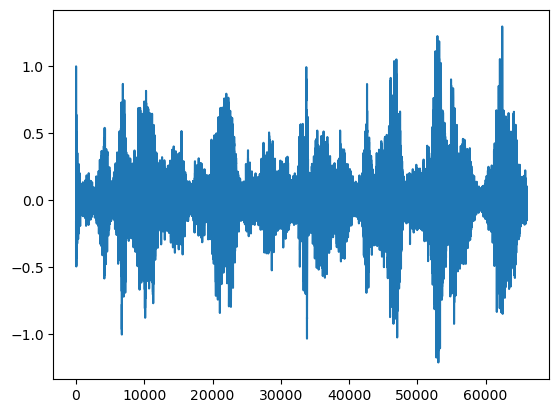

In [14]:
plt.plot(s1)

In [39]:

# 0 - blues
# 1 - classical
# 2 - country
# 3 - disco
# 4 - hiphop
# 5 - jazz
# 6 - metal
# 7 - pop
# 8 - reggae
# 9 - rock

indice = 7
indice = int(indice * 2)  

encoded = encoder.predict(mfccs[valores[indice]:valores[indice+1]])

# Parâmetros da distribuição normal desejada
media_desejada = np.mean(encoded)
desvio_padrao_desejado = np.std(encoded)

controle = True
sr = 22050
while controle:
    
    nova_entrada = np.random.normal(loc=media_desejada, scale=desvio_padrao_desejado, size=(512,))
    
    # Adicionar uma dimensão para corresponder à entrada do decoder
    nova_entrada = np.expand_dims(nova_entrada, axis=0)

    # Agora, você pode usar esta nova entrada para o decoder
    saida_decoder = decoder.predict(nova_entrada)
    saida_decoder = saida_decoder * max

    sound = librosa.feature.inverse.mfcc_to_audio(saida_decoder, n_mels=128)
    sound = np.concatenate([sound[0], np.zeros(102)])

    mfcc = np.mean(librosa.feature.mfcc(y=sound, sr=sr, n_mfcc=128), axis=1, keepdims=True)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=sound, sr=sr), axis=1, keepdims=True)
    rms = np.mean(librosa.feature.rms(y=sound))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=sound, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=sound, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=sound, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=sound))
    caracteristicas = np.vstack((mfcc, chroma_stft, rms, spectral_centroid,
                                            spectral_bandwidth, rolloff, zero_crossing_rate))

    caracteristicas = caracteristicas / max_c
    caracteristicas = np.expand_dims(caracteristicas, axis =0)
    classe = classificador.predict(caracteristicas)
    
    print(str(classe[0, int(indice/2)]*100) + ' %_ de probabiblidade de ser ' + generes[int(indice/2)])
    if classe[0, int(indice/2)] >= 0.90:
        controle = False

ipd.Audio(sound,rate=22050)
    


1/1 [==============================] - 0s 24ms/step
4.73721826210749e-05 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 21ms/step
2.00944934040308 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 20ms/step
1.9867627034102393e-12 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 20ms/step
8.033196830551406e-19 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 18ms/step
0.2217400586232543 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 19ms/step
3.5645422258312465e-05 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 19ms/step
0.000964016726356931 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 18ms/step
2.283145672521414e-07 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 19ms/step
1.561770934799256e-07 %_ de probabiblidade de ser pop
1/1 [==============================] - 0s 19ms/step
0.

KeyboardInterrupt: 

29/29 [==============================] - 0s 6ms/step


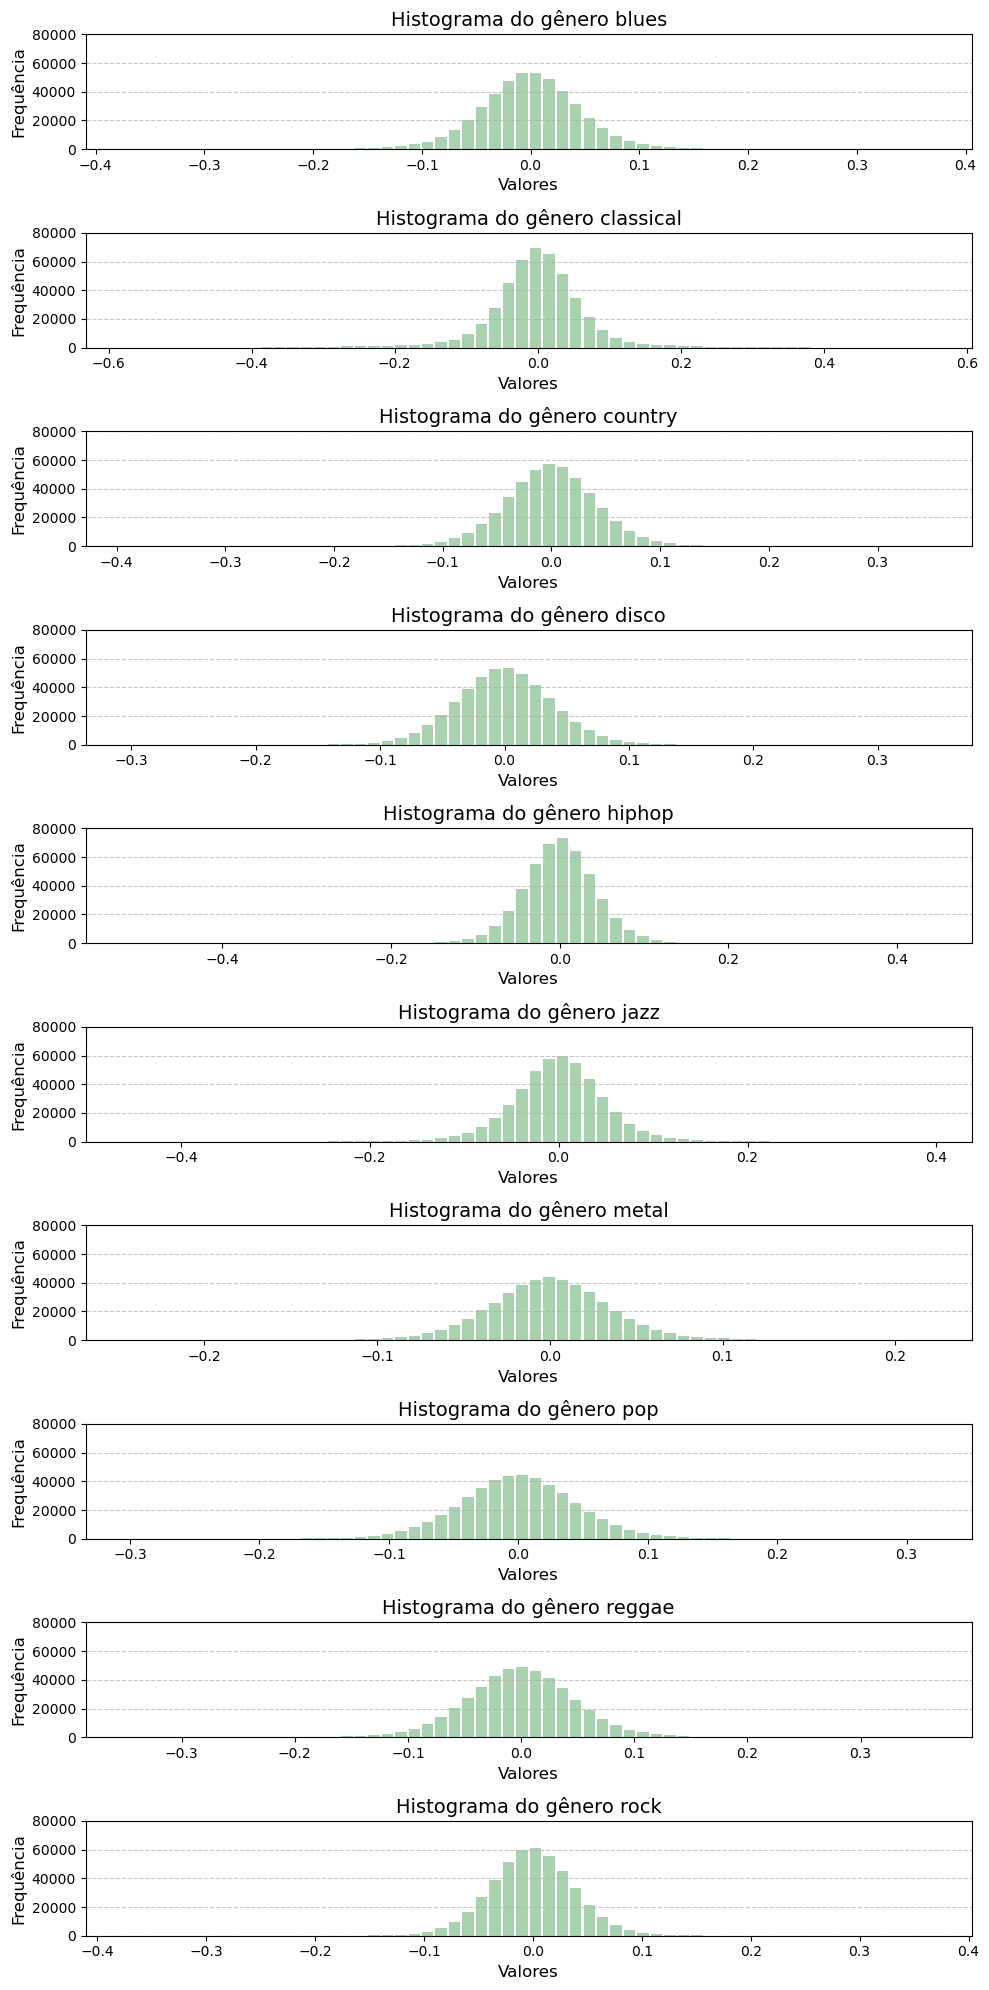

In [ ]:
import matplotlib.pyplot as plt

valores = [0, 900, 900, 1800, 1800, 2700, 2700, 3600, 3600, 4500, 4500, 5391, 5391, 6291, 6291, 7191, 7191, 8091, 8091, 8991]

# Configurar subplots
fig, axs = plt.subplots(len(valores)//2, 1, figsize=(10, 2*len(valores)//2))

# Altura fixa para o eixo y
y_height = 80000

# Iterar sobre os pares de índices na lista de valores
for i, (start_index, end_index) in enumerate(zip(valores[::2], valores[1::2])):
    # Realizar a codificação do conjunto de teste
    encoded = encoder.predict(mfccs[start_index:end_index])

    # Flatten a matriz para criar um vetor unidimensional
    vetor_unidimensional = encoded.flatten()

    # Plotar o histograma no subplot correspondente
    axs[i].hist(vetor_unidimensional, bins=60, color='#86bf91', alpha=0.7, rwidth=0.85)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].set_title(f'Histograma do gênero {generes[i]}', fontsize=14)
    axs[i].set_xlabel('Valores', fontsize=12)
    axs[i].set_ylabel('Frequência', fontsize=12)
    axs[i].set_ylim([0, y_height])  # Fixar altura do eixo y
    axs[i].tick_params(axis='both', which='major', labelsize=10)

# Ajustar layout
plt.tight_layout()
plt.savefig('histogramas.pdf', format='pdf')
plt.show()



 - gerar um numero entre esses valores para cada coluna
 - esses valores serao um vetor de entrada para o decoder

In [ ]:
# Inicializar lista para armazenar os valores aleatórios

teste = []
for i in range(3):
    valores_aleatorios = []
    # Loop sobre cada posição nos vetores
    for posicao in range(num_posicoes):

        # Gerar um valor aleatório entre os dois valores
        valor_aleatorio = np.random.uniform(pesos[posicao][0], pesos[posicao][1])

        # Adicionar o valor à lista
        valores_aleatorios.append(valor_aleatorio)

    entrada = np.array(valores_aleatorios)
    entrada = np.expand_dims(entrada, axis=0)

    # print(entrada.shape)

    t = decoder.predict(entrada)
    teste.append(t)
teste = np.array(teste)
teste = np.concatenate(teste, axis=2)
teste = teste * max


1/1 [==============================] - 0s 26ms/step


- gerando a música

In [ ]:
s1 = librosa.feature.inverse.mfcc_to_audio(teste[0], n_mels=128)
ipd.Audio(s1,rate=22050)

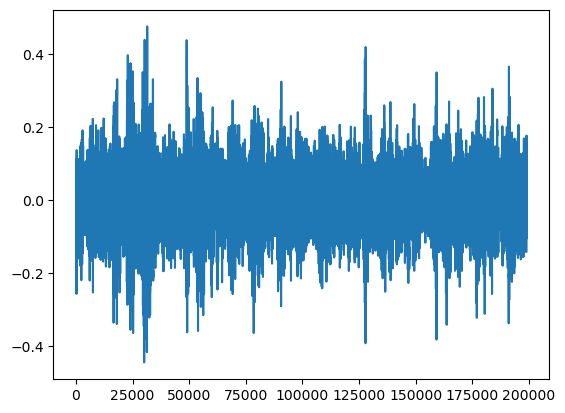

In [ ]:
plt.plot(s1)